# PSI3532 - Filtragem Adaptativa e Aplicacoes
Segunda prova
----------------------------------------------------
Henrique Souza de Melo - 9347031

In [1]:
import numpy as np
from numpy import pi, cos, sqrt, zeros
from numpy.random import randn

import matplotlib.pyplot as plt
from matplotlib import rcParams

from scipy import signal

from filters import NLMS

In [111]:
def p2(sigma=sqrt(1e-3), total_time=4000, mu_0=1, epsilon=1e-3, filename='results.png'):
    s = np.random.choice([-1,1], size=total_time, p=[.5,.5])
    r = np.random.randn(total_time) * sigma
    x = signal.lfilter(b=[1], a=[1, -.95], x=s) + r
    
    nlms_filter = NLMS(M=2, mu_0=mu_0, epsilon=epsilon)
    
    for i in range(total_time):
        nlms_filter.buffer(x[i], s[i])
        
    # realizando limiarizacao em 0 para comparar resultado
    received = np.array([-1 if y_i < 0 else 1 for y_i in nlms_filter.y_])
    bit_error_rate = (received != s).sum() / len(s)
    
    # plotando resultados
    n = np.arange(len(s))
    
    rcParams.update({'font.size':15})
    fig = plt.figure(figsize=(15,10))
    fig.suptitle('Resultados para $\sigma^2={sigma_2}$'.format(
        sigma_2=round(sigma**2, 3)),
                 fontsize=18)
    
    ax1 = plt.subplot(211)
    plt.plot(n, s, n, nlms_filter.y_)
    plt.title('Comparação do sinal $s[n]$ e $\hat{y}[n]$', fontsize=16)
    plt.legend(['$s[n]$', '$\hat{y}[n]$'])
    plt.xlabel('n')
    
    plt.subplot(223)
    plt.title('Progressão do coeficiente $w_1$', fontsize=16)
    plt.plot(n, nlms_filter.W[:, 0],'r')
    plt.axhline(y=1, linestyle='--', color='.5')
    plt.xlabel('n')
    
    plt.subplot(224)
    plt.title('Progressão do coeficiente $w_2$', fontsize=16)
    plt.plot(n, nlms_filter.W[:, 1], 'g')
    plt.axhline(y=-.95, linestyle='--', color='.5')
    plt.xlabel('n')
    
    plt.text(0, 1.25,
             'BER = {}%'.format(bit_error_rate * 100),
             ha='center', va='center',
             transform=ax1.transAxes)
    
    plt.savefig(filename, bbox_inches='tight')

    return s, nlms_filter

## $\sigma^2=10^{-3}$

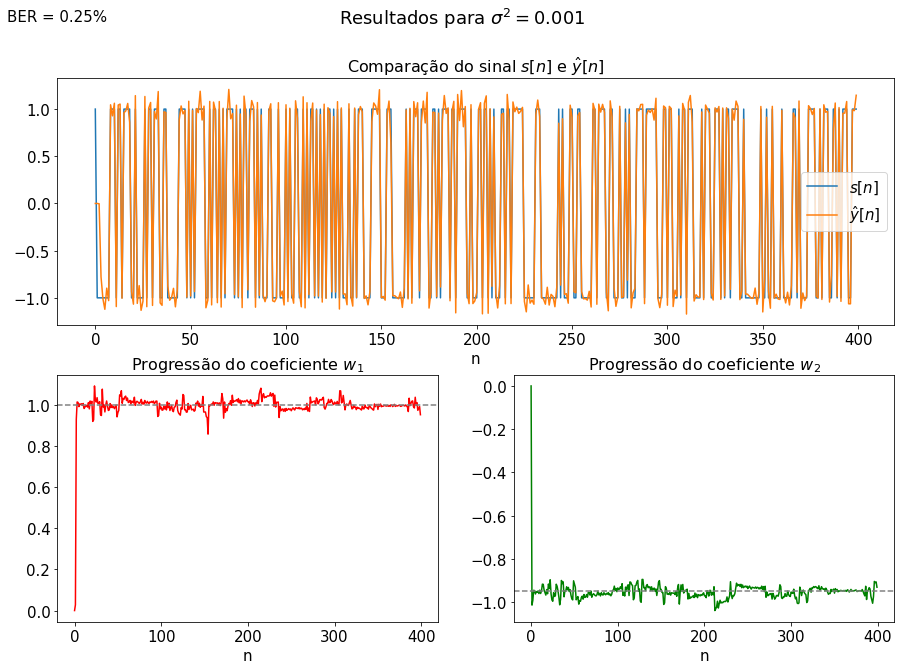

In [112]:
s, nlms_filter = p2(
    sigma=sqrt(1e-3),
    total_time=400,
    mu_0=1,
    epsilon=0,
    filename='./images/results1.png'
)

## $\sigma^2=10^{-1}$

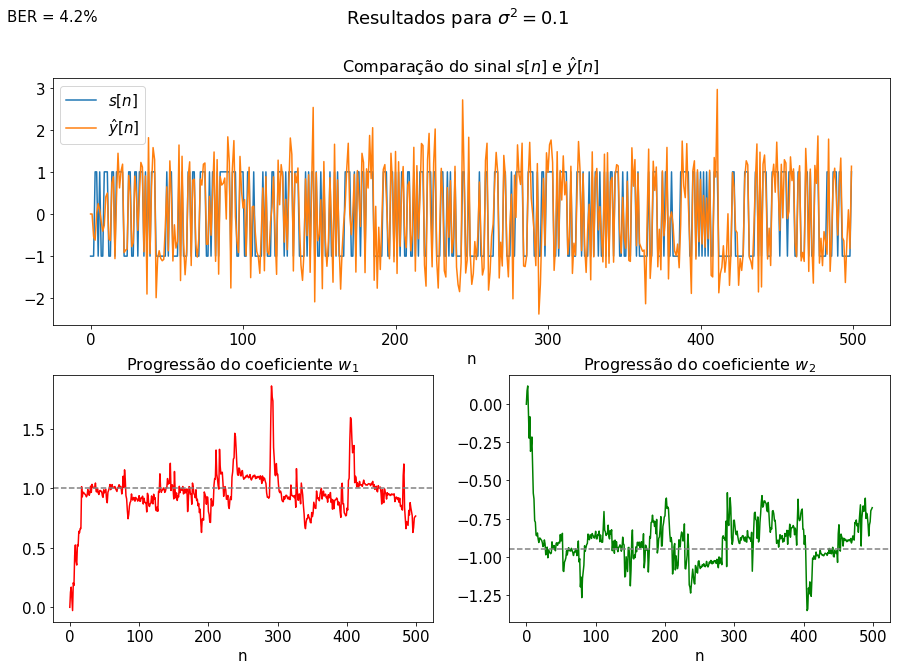

In [113]:
s, nlms_filter = p2(
    sigma=sqrt(1e-1),
    total_time=500,
    mu_0=.4,
    epsilon=1e-1,
    filename='./images/results2.png'
)